# Word2vec implementation

In this notebook, word2vec is implemented testing different hyperparameters and followingly visualized.

In [ ]:
import os
import csv
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv("train_stockemo.csv", encoding="utf-8")
train_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100001,2020-01-01,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...
1,100002,2020-01-01,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...
2,100003,2020-01-01,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...
3,100004,2020-01-01,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla..."
4,100005,2020-01-01,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars..."
...,...,...,...,...,...,...,...
7995,109536,2020-08-06,AAPL,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richa...,BREAKING NEWS: Apple beats Elon Musk and Richa...
7996,109541,2020-08-10,AAPL,belief,bullish,$AAPL why be a 2T giant and not dabble a littl...,Apple why be a 2T giant and not dabble a littl...
7997,109561,2020-08-18,AMZN,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming fac..."
7998,109795,2020-10-01,TSLA,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes]


In [ ]:
val_df = pd.read_csv("val_stockemo.csv", encoding="utf-8")
val_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100595,2020-02-06,TSLA,anger,bearish,$TSLA did jim Cramer just pull another bear St...,Tesla did jim Cramer just pull another bear St...
1,100693,2020-02-11,FB,anger,bearish,$FB uh oh FTC turning up the heat 💩,Facebook uh oh FTC turning up the heat [pile ...
2,101203,2020-03-04,AAPL,anger,bullish,$AAPL why are they holding it here! WTF! ✌🏽 GL...,Apple why are they holding it here! WTF! [vic...
3,101223,2020-03-05,MSFT,belief,bullish,$MSFT 🍀🍀Target $200.00 long term ☀️☀️☀️☀️☀️,Microsoft [four leaf clover] Target $200.00 ...
4,101349,2020-03-11,AMZN,anger,bullish,$AMZN another RED day... thus is just plain ou...,Amazon another RED day... thus is just plain o...
...,...,...,...,...,...,...,...
995,108995,2020-12-31,TSLA,disgust,bullish,$TSLA What’s twice as good as $420? —————> $840 😎,Tesla What’s twice as good as $420? —————> $84...
996,108996,2020-12-31,FB,anxiety,bearish,$FB We’ll that’s some options fuckery by insti...,Facebook We’ll that’s some options fuckery by ...
997,108997,2020-12-31,TSLA,optimism,bullish,$TSLA the daily looks like a big ✅ check mark!...,Tesla the daily looks like a big [check mark ...
998,108998,2020-12-31,BA,optimism,bullish,"$BA this will pump when you least expect it, r...",Boeing this will pump when you least expect it...


In [ ]:
test_df = pd.read_csv("test_stockemo.csv", encoding="utf-8")
test_df

,id,date,ticker,emo_label,senti_label,original,processed
0,100067,2020-01-08,AAPL,confusion,bearish,$AAPL with all time highs again the market see...,Apple with all time highs again the market see...
1,100115,2020-01-10,BA,anxiety,bullish,$BA about to explode 🚨\nKeep shorting please,Boeing about to explode [police car light] \n...
2,100175,2020-01-15,SBUX,confusion,bearish,"$SBUX TPO alot of volume at 91.74, thats after...","Starbucks TPO alot of volume at 91.74, thats a..."
3,100234,2020-01-18,TSLA,confusion,bearish,$TSLA down 6$ afterhours right now 🤔,Tesla down 6$ afterhours right now [thinking ...
4,100268,2020-01-22,BA,confusion,bearish,$BA can someone tell me why they haven’t downg...,Boeing can someone tell me why they haven’t do...
...,...,...,...,...,...,...,...
995,109996,2020-12-31,ABNB,optimism,bearish,"$ABNB “sugar daddy puts.” Don’t mind me, I’m j...","Airbnb “sugar daddy puts.” Don’t mind me, I’m ..."
996,109997,2020-12-31,TSLA,disgust,bullish,$TSLA \nGood news... now bears can get help wh...,Tesla \nGood news... now bears can get help wh...
997,109998,2020-12-31,BABA,confusion,bullish,$BABA Who else is glad they sold in 240s yeste...,Alibaba Who else is glad they sold in 240s yes...
998,109999,2020-12-31,CCL,amusement,bullish,$CCL $23 calls for .79 you know what to do 🥳,Carnival $23 calls for .79 you know what to do...


In [ ]:
missing_values = train_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

duplicates = train_df.duplicated().sum()
print("\nNumber of duplicate rows:")
print(duplicates)

Missing values in each column:
id             0
date           0
ticker         0
emo_label      0
senti_label    0
original       0
processed      0
dtype: int64

Number of duplicate rows:
0


In [ ]:
unique_ticker_train = set(train_df['ticker'].unique())
unique_ticker_val = set(val_df['ticker'].unique())
unique_ticker_test = set(test_df['ticker'].unique())

unique_ticker_val_test = unique_ticker_val.union(unique_ticker_test)
val_test_not_in_train = unique_ticker_val_test - unique_ticker_train
train_not_in_val_test = unique_ticker_train - unique_ticker_val_test

print("Ticker presenti in val/test ma non in train:")
print(val_test_not_in_train)

print("\nTicker presenti in train ma non in val/test:")
print(train_not_in_val_test)

Ticker presenti in val/test ma non in train:
set()

Ticker presenti in train ma non in val/test:
{'PG', 'AMT'}


In [ ]:
unique_ticker = sorted(unique_ticker_train)
print(unique_ticker)

['AAPL', 'ABNB', 'AMT', 'AMZN', 'BA', 'BABA', 'BAC', 'BKNG', 'BRK.B', 'CCL', 'CVX', 'DIS', 'FB', 'GOOG', 'GOOGL', 'HD', 'JNJ', 'JPM', 'KO', 'LOW', 'MA', 'MCD', 'MSFT', 'NFLX', 'NKE', 'NVDA', 'PFE', 'PG', 'PYPL', 'SBUX', 'TSLA', 'TSM', 'UNH', 'UPS', 'V', 'WMT', 'XOM']


In [ ]:
ticker_to_name = {
    'AAPL': 'Apple',
    'ABNB': 'Airbnb',
    'AMT': 'American Tower',
    'AMZN': 'Amazon',
    'BA': 'Boeing',
    'BABA': 'Alibaba',
    'BAC': 'Bank of America',
    'BKNG': 'Booking Holdings',
    'BRK.B': 'Berkshire Hathaway',
    'CCL': 'Carnival',
    'CVX': 'Chevron',
    'DIS': 'Disney',
    'FB': 'Meta (Facebook)',
    'GOOG': 'Google',
    'GOOGL': 'Google (Class A)',
    'HD': 'Home Depot',
    'JNJ': 'Johnson & Johnson',
    'JPM': 'JPMorgan Chase',
    'KO': 'Coca-Cola',
    'LOW': 'Lowe’s',
    'MA': 'Mastercard',
    'MCD': 'McDonald’s',
    'MSFT': 'Microsoft',
    'NFLX': 'Netflix',
    'NKE': 'Nike',
    'NVDA': 'NVIDIA',
    'PFE': 'Pfizer',
    'PG': 'Procter & Gamble',
    'PYPL': 'PayPal',
    'SBUX': 'Starbucks',
    'TSLA': 'Tesla',
    'TSM': 'Taiwan Semiconductor',
    'UNH': 'UnitedHealth',
    'UPS': 'UPS',
    'V': 'Visa',
    'WMT': 'Walmart',
    'XOM': 'ExxonMobil'
}

In [ ]:
for df in [train_df, val_df, test_df]:
    df.drop(columns=['id', 'date', 'ticker'], inplace=True)

In [ ]:
train_df

,emo_label,senti_label,original,processed
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...
2,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla..."
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars..."
...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richa...,BREAKING NEWS: Apple beats Elon Musk and Richa...
7996,belief,bullish,$AAPL why be a 2T giant and not dabble a littl...,Apple why be a 2T giant and not dabble a littl...
7997,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming fac..."
7998,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes]


In [ ]:
pd.set_option('display.max_colwidth', None)
print(train_df['original'].sample(10))

5321                                                                                                            $TSLA soon.. 300 🧐🧐.. called 325.. maybe 250-275..🙌🙌..
3561                                                                                       $TSLA Finally picked the right day to hold TSLA fd’s overnight. Jah Bless 🙏
1                                                                                      $TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻
323                                                                                                                                     $PFE 🤦‍♂️ jnj is all time high
4805    While Amazon is the juggernaut of the retail market, I do see Walmart coming. The question is, how much of a run for their money will they give Amazon 🤔🤔 $WMT
3914                                                                                                              $TSLA dont dont ur vibe - congrats Elon and tesla! 

In [ ]:
import re
import emoji


def replace_ticker_with_name(text, ticker_to_name):
    ticker_pattern = r'\$({})'.format('|'.join(map(re.escape, ticker_to_name.keys())))
    def replace_match(match):
        ticker = match.group(1)
        return ticker_to_name.get(ticker, ticker)
    text = re.sub(ticker_pattern, replace_match, text)

    return text

def add_punctuation_tokens(text):
    text = re.sub(r'(\!)\1{1,}', lambda match: " multiple_exclamation ", text)
    text = re.sub(r'(\?)\1{1,}', " multiple_question ", text)
    text = re.sub(r'(\.){2,}', " multiple_ellipsis ", text)
    return text

def remove_neutral_punctuation(text):
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)
    text = re.sub(r'(?<![\(\)])[;:](?![\(\)])', '', text)
    text = re.sub(r'[,|"]', '', text)
    return text

def handle_quotes(text):
    text = text.replace("“", '"').replace("”", '"')
    return text

import re

def map_names_to_placeholder(text, ticker_to_name):
    company_names = list(ticker_to_name.values())
    pattern = r'\b(' + '|'.join(re.escape(name) for name in company_names) + r')\b'
    return re.sub(pattern, ' company_name ', text)

In [ ]:
def preprocess_text(text):
    text = replace_ticker_with_name(text, ticker_to_name)
    text = text.replace('\n', ' ')
    text = map_names_to_placeholder(text, ticker_to_name)
    text = add_punctuation_tokens(text)
    text = handle_quotes(text)
    text = remove_neutral_punctuation(text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

for df in [train_df, val_df, test_df]:
    df['tfidf_emoji'] = df['original'].apply(preprocess_text)

In [ ]:
def replace_emoji_with_text(text):
    demojized_text = emoji.demojize(text, delimiters=(" ", " "))
    demojized_text = re.sub(r'\s+', ' ', demojized_text).strip()

    return demojized_text

for df in [train_df, val_df, test_df]:
    df['tfidf_demojized'] = df['tfidf_emoji'].apply(replace_emoji_with_text)

In [ ]:
def remove_emojis(text):
    text_no_emoji = emoji.replace_emoji(text, replace="")
    return text_no_emoji.strip()

for df in [train_df, val_df, test_df]:
    df['tfidf_no_emoji'] = df['tfidf_emoji'].apply(remove_emojis)

In [ ]:
train_df

,emo_label,senti_label,original,processed,tfidf_emoji,tfidf_demojized,tfidf_no_emoji
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [partying face],company_name Dow futures up by 100 points already 🥳,company_name Dow futures up by 100 points already partying_face,company_name Dow futures up by 100 points already
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,Tesla Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! [clinking beer mugs],company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! clinking_beer_mugs,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020!
2,confusion,bullish,$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,Apple We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm [thinking face] . I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm 🤔 I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm thinking_face I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm I have 20 mins to decide Any suggestions?
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine glass] [party popper] [folded hands]",company_name happy new year 2020 everyone🍷🎉🙏,company_name happy new year 2020 everyone wine_glass party_popper folded_hands,company_name happy new year 2020 everyone
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*","Tesla haha just a collection of greats...""Mars"" rofl [smiling face with horns] [smiling face with sunglasses] [shooting star] [fast up button] [crystal ball] [money with wings] [clapping hands] [flexed biceps] [rocket] [fireworks] [sparkler] [megaphone] [party popper] [confetti ball] *bork*",company_name haha just a collection of greats multiple_ellipsis Mars rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl smiling_face_with_horns smiling_face_with_sunglasses shooting_star fast_up_button crystal_ball money_with_wings clapping_hands flexed_biceps rocket fireworks sparkler megaphone party_popper confetti_ball *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl *bork*
...,...,...,...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richard Branson into space! 🚀📈 \n🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS: Apple beats Elon Musk and Richard Branson into space! [rocket] [chart increasing] \n [green apple],BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! rocket chart_increasing green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple green_apple,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space!
7996,belief,bullish,$AAPL why be a 2T giant and not dabble a little bit? 🍎🚗 🍎✈ #AppleAirlines #AppleEV,Apple why be a 2T giant and not dabble a little bit? [red apple] [automobile] [airplane] #AppleAirlines #AppleEV,company_name why be a 2T giant and not dabble a little bit? 🍎🚗 🍎✈ #AppleAirlines #AppleEV,company_name why be a 2T giant and not dabble a little bit? red_apple automobile red_apple airplane #AppleAirlines #AppleEV,company_name why be a 2T giant and not dabble a little bit? #A

Four combinations of hyperparameters for word2vec are tested in order to select the suitable instance for the classification task. In particular:
* Vector size (100, 50)
* Window (5, 2)

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import numpy as np

def load_lexicon(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return set(file.read().splitlines())

bing_liu_positive = load_lexicon('positive-words.txt')
bing_liu_negative = load_lexicon('negative-words.txt')

def calculate_agreement_and_class_score(text, positive_lexicon, negative_lexicon):
    words = word_tokenize(re.sub(r'[^\w\s]', '', text.lower()))
    T_pos = sum(1 for word in words if word in positive_lexicon)
    T_neg = sum(1 for word in words if word in negative_lexicon)

    if T_pos + T_neg == 0:
        agreement_score = 0
    else:
        agreement_score = 1 - np.sqrt(1 - abs((T_pos - T_neg) / (T_pos + T_neg)))

    if T_pos > T_neg:
        class_score = 1
    elif T_pos < T_neg:
        class_score = -1
    else:
        class_score = 0

    return agreement_score, class_score

def create_feature_dataframe(df, text_column):
    features = {
        'bing_agreement_score': [],
        'bing_class_score': []
    }

    for text in df[text_column]:
        bing_agreement, bing_class = calculate_agreement_and_class_score(text, bing_liu_positive, bing_liu_negative)
        features['bing_agreement_score'].append(bing_agreement)
        features['bing_class_score'].append(bing_class)

    feature_df = pd.DataFrame(features)
    return feature_df

train_features_df = create_feature_dataframe(train_df, 'tfidf_demojized')
print(train_features_df.head())

   bing_agreement_score  bing_class_score
0                   0.0                 0
1                   0.0                 0
2                   1.0                 1
3                   1.0                 1
4                   0.0                 0


In [ ]:
print(train_features_df.sample(20))

      bing_agreement_score  bing_class_score
7162                   1.0                 1
374                    0.0                 0
4232                   0.0                 0
4027                   1.0                 1
266                    0.0                 0
5726                   0.0                 0
2149                   1.0                -1
3454                   1.0                -1
6272                   0.0                 0
1095                   1.0                 1
7148                   0.0                 0
1330                   0.0                 0
5481                   0.0                 0
3513                   0.0                 0
2243                   1.0                 1
6932                   1.0                 1
4136                   1.0                 1
7710                   1.0                -1
3783                   1.0                -1
5056                   1.0                -1


In [ ]:
val_features_df = create_feature_dataframe(val_df, 'tfidf_demojized')
test_features_df = create_feature_dataframe(test_df, 'tfidf_demojized')

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

def load_nrc_lexicon(filepath):
    nrc_lexicon = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            word, emotion, association = line.strip().split("\t")
            if int(association) == 1:
                if word not in nrc_lexicon:
                    nrc_lexicon[word] = []
                nrc_lexicon[word].append(emotion)
    return nrc_lexicon

def calculate_normalized_emotion_counts(text, nrc_lexicon):
    tokens = word_tokenize(text.lower())
    emotion_counts = Counter()

    for token in tokens:
        if token in nrc_lexicon:
            emotions = nrc_lexicon[token]
            emotion_counts.update(emotions)

    total_words = len(tokens)

    normalized_emotions = {emotion: count / total_words if total_words > 0 else 0
                           for emotion, count in emotion_counts.items()}

    return normalized_emotions, total_words

def create_emotion_features(df, text_column, nrc_lexicon):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
                'positive', 'sadness', 'surprise', 'trust']

    emotion_features = {emotion: [] for emotion in emotions}
    for text in df[text_column]:
        emotion_counts, total_words = calculate_normalized_emotion_counts(text, nrc_lexicon)
        text_lengths.append(total_words)
        for emotion in emotions:
            emotion_features[emotion].append(emotion_counts.get(emotion, 0))

    emotion_features_df = pd.DataFrame(emotion_features)
    emotion_features_df['text_length'] = text_lengths

    return emotion_features_df

nrc_lexicon = load_nrc_lexicon("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")

train_emotion_features_df = create_emotion_features(train_df, 'tfidf_emoji', nrc_lexicon)

train_features_df = pd.concat([train_features_df.reset_index(drop=True),
                               train_emotion_features_df.reset_index(drop=True)], axis=1)

print(train_features_df.head())

   bing_agreement_score  bing_class_score  anger  anticipation  disgust  fear  \
0                   0.0                 0    0.0      0.000000      0.0   0.0   
1                   0.0                 0    0.0      0.000000      0.0   0.0   
2                   1.0                 1    0.0      0.000000      0.0   0.0   
3                   1.0                 1    0.0      0.166667      0.0   0.0   
4                   0.0                 0    0.0      0.000000      0.0   0.0   

        joy  negative  positive  sadness  surprise     trust  text_length  
0  0.000000       0.0  0.000000      0.0       0.0  0.000000            9  
1  0.000000       0.0  0.000000      0.0       0.0  0.000000           21  
2  0.000000       0.0  0.000000      0.0       0.0  0.000000           28  
3  0.166667       0.0  0.166667      0.0       0.0  0.166667            6  
4  0.000000       0.0  0.000000      0.0       0.0  0.000000           14  


In [ ]:
test_emotion_features_df = create_emotion_features(test_df, 'tfidf_emoji', nrc_lexicon)
test_features_df = pd.concat([test_features_df.reset_index(drop=True),
                               test_emotion_features_df.reset_index(drop=True)], axis=1)

val_emotion_features_df = create_emotion_features(val_df, 'tfidf_emoji', nrc_lexicon)
val_features_df = pd.concat([val_features_df.reset_index(drop=True),
                               val_emotion_features_df.reset_index(drop=True)], axis=1)

In [ ]:
unique_emotions = set()
for emotions in nrc_lexicon.values():
    unique_emotions.update(emotions)
print(f"Numero totale di emozioni nel NRC Lexicon: {len(unique_emotions)}")

print("Emozioni uniche:", unique_emotions)

Numero totale di emozioni nel NRC Lexicon: 10
Emozioni uniche: {'joy', 'surprise', 'positive', 'disgust', 'sadness', 'anticipation', 'anger', 'negative', 'fear', 'trust'}


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


def extract_vader_features(text):

    scores = sia.polarity_scores(text)
    return [scores['pos'], scores['neu'], scores['neg'], scores['compound']]


def create_vader_feature_df(df, text_column):
    vader_features = df[text_column].apply(extract_vader_features)
    vader_columns = ['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound']
    return pd.DataFrame(vader_features.tolist(), columns=vader_columns)


train_vader_features_df = create_vader_feature_df(train_df, 'tfidf_emoji')

train_features_df = pd.concat([train_features_df.reset_index(drop=True),
                               train_vader_features_df.reset_index(drop=True)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
test_vader_features_df = create_vader_feature_df(test_df, 'tfidf_emoji')
test_features_df = pd.concat([test_features_df.reset_index(drop=True),
                               test_vader_features_df.reset_index(drop=True)], axis=1)

val_vader_features_df = create_vader_feature_df(val_df, 'tfidf_emoji')
val_features_df = pd.concat([val_features_df.reset_index(drop=True),
                               val_vader_features_df.reset_index(drop=True)], axis=1)

In [ ]:

def calculate_uppercase_ratio_ignore_emoji(text):

    text_no_emoji = re.sub(r'\<.*?\>', '', text)

    words = text_no_emoji.split()

    uppercase_words = [word for word in words if word.isupper() and len(word) > 1]

    total_words = len(words)

    return len(uppercase_words) / total_words if total_words > 0 else 0

train_features_df['uppercase_ratio'] = train_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)

In [ ]:
test_features_df['uppercase_ratio'] = test_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)
val_features_df['uppercase_ratio'] = val_df['tfidf_no_emoji'].apply(calculate_uppercase_ratio_ignore_emoji)

In [ ]:
import spacy


nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

for df in [train_df, val_df, test_df]:
    df['lemmatized'] = df['tfidf_demojized'].apply(lemmatize_text)

In [ ]:
train_df

,emo_label,senti_label,original,processed,tfidf_emoji,tfidf_demojized,tfidf_no_emoji,lemmatized
0,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [partying face],company_name Dow futures up by 100 points already 🥳,company_name Dow futures up by 100 points already partying_face,company_name Dow futures up by 100 points already,company_name Dow future up by 100 point already partying_face
1,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,Tesla Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! [clinking beer mugs],company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! 🍻,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020! clinking_beer_mugs,company_name Daddy's drinkin' eArly tonight! Here's to a PT of ohhhhh $1000 in 2020!,company_name daddy 's drinkin ' early tonight ! here be to a PT of ohhhhh $ 1000 in 2020 ! clinking_beer_mug
2,confusion,bullish,$AAPL We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm 🤔. I have 20 mins to decide. Any suggestions?,Apple We’ll been riding since last December from $172.12 what to do. Decisions decisions hmm [thinking face] . I have 20 mins to decide. Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm 🤔 I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm thinking_face I have 20 mins to decide Any suggestions?,company_name We’ll been riding since last December from $172.12 what to do Decisions decisions hmm I have 20 mins to decide Any suggestions?,company_name we ’ll be ride since last December from $ 172.12 what to do decision decision hmm thinking_face I have 20 min to decide any suggestion ?
3,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine glass] [party popper] [folded hands]",company_name happy new year 2020 everyone🍷🎉🙏,company_name happy new year 2020 everyone wine_glass party_popper folded_hands,company_name happy new year 2020 everyone,company_name happy new year 2020 everyone wine_glass party_popper folded_hand
4,excitement,bullish,"$TSLA haha just a collection of greats...""Mars"" rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*","Tesla haha just a collection of greats...""Mars"" rofl [smiling face with horns] [smiling face with sunglasses] [shooting star] [fast up button] [crystal ball] [money with wings] [clapping hands] [flexed biceps] [rocket] [fireworks] [sparkler] [megaphone] [party popper] [confetti ball] *bork*",company_name haha just a collection of greats multiple_ellipsis Mars rofl 😈😎🌠⏫🔮💸👏💪🚀🎆🎇📣🎉🎊 *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl smiling_face_with_horns smiling_face_with_sunglasses shooting_star fast_up_button crystal_ball money_with_wings clapping_hands flexed_biceps rocket fireworks sparkler megaphone party_popper confetti_ball *bork*,company_name haha just a collection of greats multiple_ellipsis Mars rofl *bork*,company_name haha just a collection of great multiple_ellipsis Mars rofl smiling_face_with_horn smiling_face_with_sunglasse shooting_star fast_up_button crystal_ball money_with_wing clapping_hand flexed_biceps rocket firework sparkler megaphone party_popper confetti_ball * bork *
...,...,...,...,...,...,...,...,...
7995,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richard Branson into space! 🚀📈 \n🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS: Apple beats Elon Musk and Richard Branson into space! [rocket] [chart increasing] \n [green apple],BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! 🚀📈 🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏🍏,BREAKING NEWS company_name beats Elon Musk and Richard Branson into space! rocket chart_increasing green_apple green_apple green_apple green_apple green_apple green_apple gree

Saving the dataset for the BERTopic notebook

In [ ]:
train_df.to_csv("train_df_TM.csv", index=False, encoding="utf-8")

Training word2vec on different values of vector size and window, then, each configuration is used to train a random forest for the classification task and the best performing model is used to determine the best value of the word2vec hyperparameters

In [ ]:
import spacy
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nlp = spacy.load("en_core_web_sm")
def tokenize_and_lemmatize(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc]
    return tokens

train_df['tokens'] = train_df['tfidf_demojized'].astype(str).apply(tokenize_and_lemmatize)
tokenized_texts = train_df['tokens'].tolist()

Vector Size: 50, Window: 2, Accuracy: 0.243


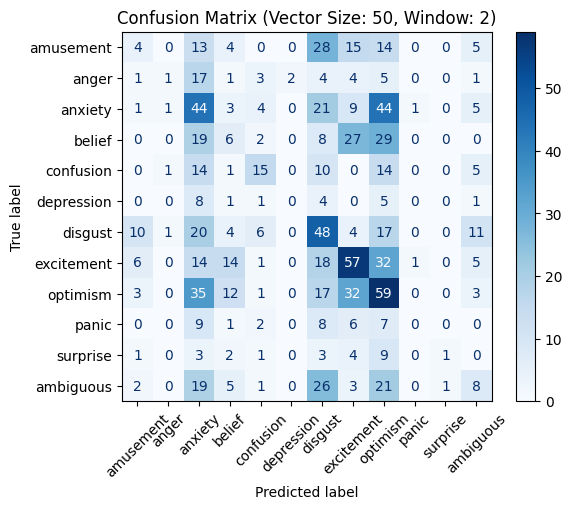

Vector Size: 50, Window: 5, Accuracy: 0.26


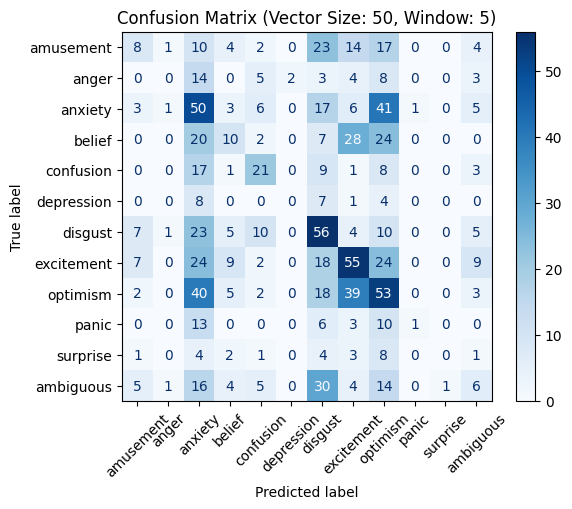

Vector Size: 100, Window: 2, Accuracy: 0.238


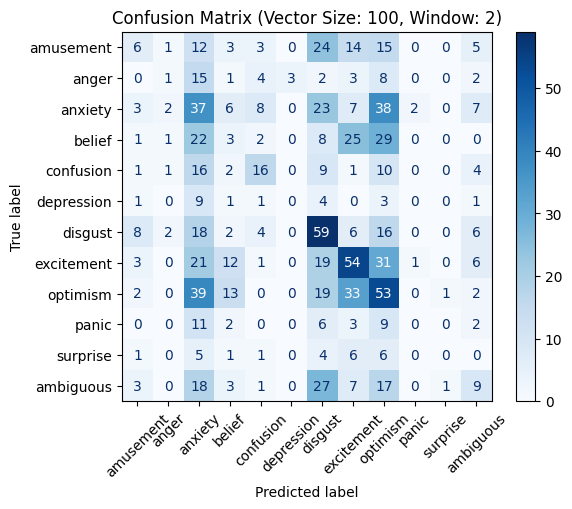

Vector Size: 100, Window: 5, Accuracy: 0.255


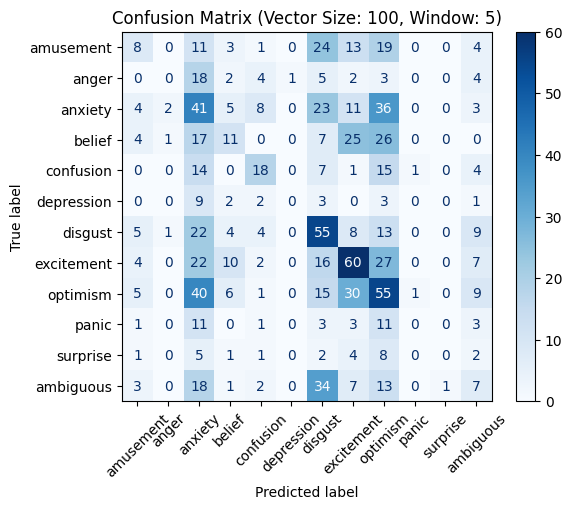

Best Parameters: {'vector_size': 50, 'window': 5}
Best Validation Accuracy: 0.26


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from gensim.models import Word2Vec
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
def tokenize_and_lemmatize(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc]
    return tokens

val_df['tokens'] = val_df['tfidf_demojized'].astype(str).apply(tokenize_and_lemmatize)
emotion_mapping = {
    'amusement': 0,
    'anger': 1,
    'anxiety': 2,
    'belief': 3,
    'confusion': 4,
    'depression': 5,
    'disgust': 6,
    'excitement': 7,
    'optimism': 8,
    'panic': 9,
    'surprise': 10,
    'ambiguous': 11,
}

best_model = None
best_params = None
best_accuracy = 0

vector_sizes = [50, 100]
windows = [2, 5]

for vector_size in vector_sizes:
    for window in windows:
        word2vec_model = Word2Vec(
            sentences=train_df['tokens'].tolist(),
            vector_size=vector_size,
            window=window,
            min_count=2,
            workers=4
        )

        def compute_embeddings(df, model):
            embeddings = []
            for tokens in df['tokens']:
                word_vectors = [model.wv[word] for word in tokens if word in model.wv]
                if word_vectors:
                    embeddings.append(np.mean(word_vectors, axis=0))
                else:
                    embeddings.append(np.zeros(model.vector_size))
            return np.array(embeddings)

        X_train = compute_embeddings(train_df, word2vec_model)
        X_val = compute_embeddings(val_df, word2vec_model)

        y_train = train_df['emo_label'].map(emotion_mapping)
        y_val = val_df['emo_label'].map(emotion_mapping)

        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train, y_train)

        y_val_pred = rf_model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        print(f"Vector Size: {vector_size}, Window: {window}, Accuracy: {val_accuracy}")

        cm = confusion_matrix(y_val, y_val_pred)
        emotion_labels = list(emotion_mapping.keys())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_labels)
        disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
        plt.title(f"Confusion Matrix (Vector Size: {vector_size}, Window: {window})")
        plt.show()

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model = rf_model
            best_params = {'vector_size': vector_size, 'window': window}

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

The optimal word2vec (with vector size equal to 50 and window equal to 5) is visualized with t-SNE (t-distributed Stochastic Neighbor Embedding), which preserves local structures while reducing dimensionality (in order to be able to visualize it)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import random

best_vector_size = 50
best_window = 5

word2vec_model = Word2Vec(
    sentences=train_df['tokens'].tolist(),
    vector_size=best_vector_size,
    window=best_window,
    min_count=2,
    workers=4
)

vocab = list(word2vec_model.wv.key_to_index.keys())
embeddings = np.array([word2vec_model.wv[word] for word in vocab])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

Some words are choosen to display the distances in the embedding

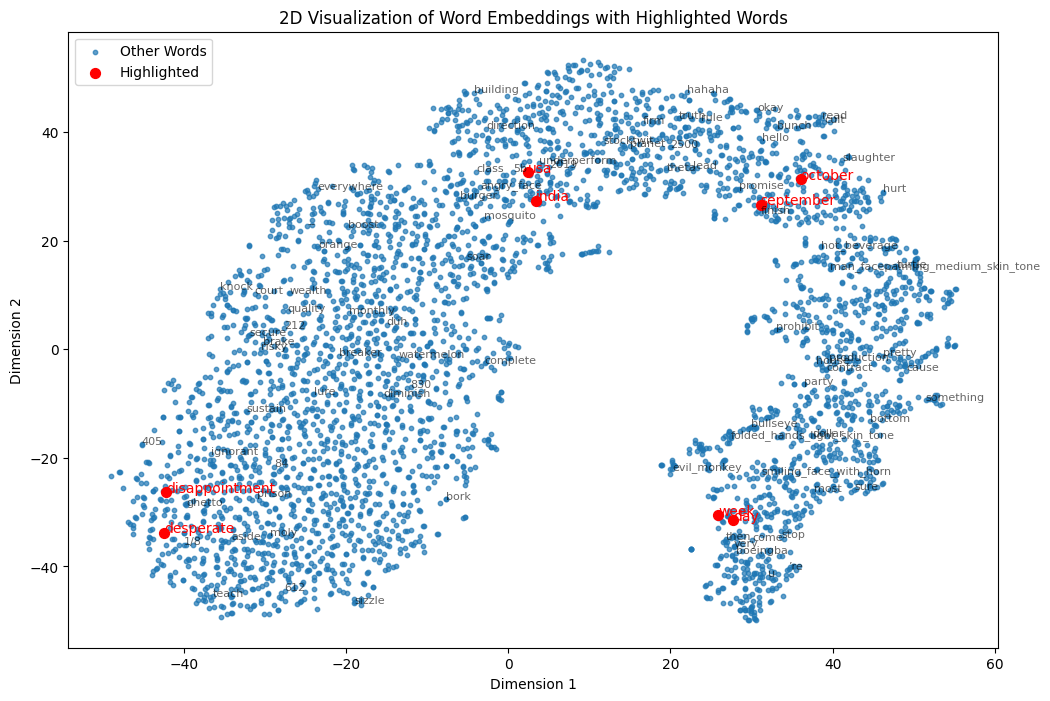

In [ ]:
highlight_words = {"week", "day", "india", "usa", "desperate", "disappointment", "september", "october"}

plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=10, alpha=0.7, label="Other Words")

for i, word in enumerate(vocab):
    if word in highlight_words:
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], s=50, color='red', label=f"Highlighted" if word == list(highlight_words)[0] else "")
        plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=10, color='red')
    else:
        if random.random() < 0.02:
            plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8, alpha=0.6)

plt.title("2D Visualization of Word Embeddings with Highlighted Words")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(loc="upper left", fontsize=10)
plt.show()

In [ ]:
y_train = train_df['emo_label']
y_val = val_df['emo_label']
y_test = test_df['emo_label']

print("Dimensioni delle etichette target:")
print(f"Train set: {y_train.shape}")
print(f"Validation set: {y_val.shape}")
print(f"Test set: {y_test.shape}")

Dimensioni delle etichette target:
Train set: (8000,)
Validation set: (1000,)
Test set: (1000,)


In [ ]:
train_features_df

,bing_agreement_score,bing_class_score,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,text_length,vader_pos,vader_neu,vader_neg,vader_compound,uppercase_ratio
0,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9,0.000,1.000,0.0,0.0000,0.000000
1,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,21,0.000,1.000,0.0,0.0000,0.071429
2,1.0,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,28,0.000,1.000,0.0,0.0000,0.000000
3,1.0,1,0.0,0.166667,0.0,0.000000,0.166667,0.000000,0.166667,0.0,0.0,0.166667,6,0.425,0.575,0.0,0.5719,0.000000
4,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14,0.427,0.573,0.0,0.7717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.0,-1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14,0.000,1.000,0.0,0.0000,0.181818
7996,0.0,0,0.0,0.000000,0.0,0.052632,0.000000,0.000000,0.000000,0.0,0.0,0.000000,19,0.000,1.000,0.0,0.0000,0.071429
7997,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9,0.000,1.000,0.0,0.0000,0.000000
7998,0.0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,8,0.000,1.000,0.0,0.0000,0.000000


The final representation is used to train the random forest with hyperparameter optimization

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

train_tokens = train_df['lemmatized'].tolist()
val_tokens = val_df['lemmatized'].tolist()
test_tokens = test_df['lemmatized'].tolist()

word2vec_model = Word2Vec(
    sentences=train_tokens,
    vector_size=50,
    window=5,
    min_count=2,
    workers=4
)

def get_word2vec_representation(tokenized_texts, model):
    vector_size = model.vector_size
    text_vectors = []
    for tokens in tokenized_texts:
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)
        else:
            avg_vector = np.zeros(vector_size)
        text_vectors.append(avg_vector)
    return np.array(text_vectors)

X_word2vec_train = get_word2vec_representation(train_tokens, word2vec_model)
X_word2vec_val = get_word2vec_representation(val_tokens, word2vec_model)
X_word2vec_test = get_word2vec_representation(test_tokens, word2vec_model)

X_word2vec_combined_dict = {}
for name, X_word2vec, dense_features in zip(
    ['train', 'val', 'test'],
    [X_word2vec_train, X_word2vec_val, X_word2vec_test],
    [train_features_df.values, val_features_df.values, test_features_df.values]
):
    print(f"Processing {name} set...")
    X_combined = np.hstack([X_word2vec, dense_features])
    X_word2vec_combined_dict[name] = X_combined
    print(f"{name} set combined successfully! Shape: {X_combined.shape}")

X_train_combined = X_word2vec_combined_dict['train']
X_val_combined = X_word2vec_combined_dict['val']
X_test_combined = X_word2vec_combined_dict['test']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

results = []
for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    rf = RandomForestClassifier(**param_dict, random_state=42)
    rf.fit(X_train_combined, y_train)
    y_val_pred = rf.predict(X_val_combined)
    f1 = f1_score(y_val, y_val_pred, average="macro")
    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)
best_params, best_f1 = results[0]
print("Best parameters found:", best_params)
print(f"F1 Score on validation set: {best_f1:.4f}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_combined, y_train)

y_test_pred = best_rf.predict(X_test_combined)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Processing train set...
train set combined successfully! Shape: (8000, 68)
Processing val set...
val set combined successfully! Shape: (1000, 68)
Processing test set...
test set combined successfully! Shape: (1000, 68)
Best parameters found: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2}
F1 Score on validation set: 0.1429
Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.07      0.02      0.04        87
   amusement       0.17      0.05      0.07        83
       anger       0.00      0.00      0.00        38
     anxiety       0.20      0.31      0.24       134
      belief       0.24      0.09      0.13        89
   confusion       0.40      0.13      0.20        60
  depression       0.00      0.00      0.00        19
     disgust       0.26      0.40      0.32       121
  excitement       0.32      0.35      0.34       146
    optimism       0.20      0.40      0.26       163
       panic      

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
rf_classes = best_rf.classes_
print("Mapping delle classi nel modello:", rf_classes)

Mapping delle classi nel modello: ['ambiguous' 'amusement' 'anger' 'anxiety' 'belief' 'confusion'
 'depression' 'disgust' 'excitement' 'optimism' 'panic' 'surprise']


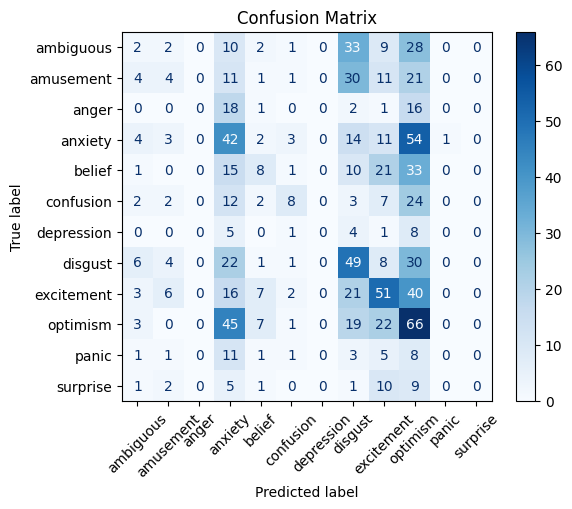

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred, labels=rf_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import itertools

results = []
for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    rf = RandomForestClassifier(**param_dict, random_state=42)
    rf.fit(X_word2vec_train, y_train)
    y_val_pred = rf.predict(X_word2vec_val)
    f1 = f1_score(y_val, y_val_pred, average="macro")
    results.append((param_dict, f1))

results = sorted(results, key=lambda x: x[1], reverse=True)
best_params, best_f1 = results[0]
print("Best parameters found:", best_params)
print(f"F1 Score on validation set: {best_f1:.4f}")
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_word2vec_train, y_train)
y_test_pred = best_rf.predict(X_word2vec_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Best parameters found: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1}
F1 Score on validation set: 0.1373
Test Set Performance:
              precision    recall  f1-score   support

   ambiguous       0.10      0.02      0.04        87
   amusement       0.12      0.04      0.06        83
       anger       0.00      0.00      0.00        38
     anxiety       0.20      0.26      0.22       134
      belief       0.14      0.07      0.09        89
   confusion       0.43      0.15      0.22        60
  depression       0.00      0.00      0.00        19
     disgust       0.27      0.42      0.33       121
  excitement       0.27      0.31      0.29       146
    optimism       0.21      0.46      0.29       163
       panic       0.50      0.03      0.06        31
    surprise       0.00      0.00      0.00        29

    accuracy                           0.23      1000
   macro avg       0.19      0.15      0.13      1000
weighted avg       0

c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Utente\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

XGBoost training and evaluation

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_combined, label=y_train_encoded)
dval = xgb.DMatrix(X_val_combined, label=y_val_encoded)

params = {
    "objective": "multi:softmax",
    "num_class": len(set(y_train_encoded)),
    "learning_rate": 0.05,
    "max_depth": 6,
    "eval_metric": "mlogloss",
    "seed": 42
}

evals = [(dtrain, "train"), (dval, "eval")]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True
)

dtest = xgb.DMatrix(X_test_combined)
y_test_pred_encoded = model.predict(dtest)

y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded.astype(int))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

[0]	train-mlogloss:2.44481	eval-mlogloss:2.46551
[1]	train-mlogloss:2.40671	eval-mlogloss:2.44982
[2]	train-mlogloss:2.37110	eval-mlogloss:2.43361
[3]	train-mlogloss:2.33880	eval-mlogloss:2.41963
[4]	train-mlogloss:2.30740	eval-mlogloss:2.40630
[5]	train-mlogloss:2.27619	eval-mlogloss:2.39301
[6]	train-mlogloss:2.24858	eval-mlogloss:2.38214
[7]	train-mlogloss:2.22111	eval-mlogloss:2.37037
[8]	train-mlogloss:2.19443	eval-mlogloss:2.36012
[9]	train-mlogloss:2.16896	eval-mlogloss:2.35101
[10]	train-mlogloss:2.14512	eval-mlogloss:2.34249
[11]	train-mlogloss:2.12080	eval-mlogloss:2.33382
[12]	train-mlogloss:2.09671	eval-mlogloss:2.32563
[13]	train-mlogloss:2.07369	eval-mlogloss:2.31734
[14]	train-mlogloss:2.05164	eval-mlogloss:2.31056
[15]	train-mlogloss:2.03089	eval-mlogloss:2.30357
[16]	train-mlogloss:2.01090	eval-mlogloss:2.29682
[17]	train-mlogloss:1.99116	eval-mlogloss:2.29085
[18]	train-mlogloss:1.97180	eval-mlogloss:2.28531
[19]	train-mlogloss:1.95344	eval-mlogloss:2.27865
[20]	train